In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [148]:
## Reading CSV
df = pd.read_csv('quests_for_question.csv',header=0)

## Adding End Date Column, using Start Date and duration
df['End Date'] = df['Start Date'] + df['Duration (in days)']

## Sorting by Maximum Finish Time
df=df.sort_values(by='End Date')
df.head(24)

,Quest,Start Date,Duration (in days),Reward (in rupees),Difficulty,Location,Quest Giver,End Date
0,Robbie's Research,1,3,750,Hard,Hateno Ancient Tech Lab,Purah,4
1,A Parent's Love,2,2,500,Easy,Tarrey Town,Ruli,4
2,The Weapon Connoisseur,1,4,920,Medium,Hateno Village,Nebb,5
4,Sunken Treasure,5,1,200,Easy,Lurelin Village,Rozel,6
5,Cooking with Koko,3,4,400,Medium,Kakariko Village,Koko,7
20,A Gift of Nightshade,4,5,410,Hard,Tuft Mountain,Wabbin,9
22,Riddles of Hyrule,7,2,1200,Hard,Great Hyrule Forest,Walton,9
18,Rushroom Rush!,9,1,460,Easy,Gerudo Canyon Stable,Pirou,10
3,Sunshroom Sensing,3,8,1050,Hard,Hateno Ancient Tech Lab,Symin,11
12,Tools of the Trade,8,3,430,Easy,Gerudo Town,Isha,11


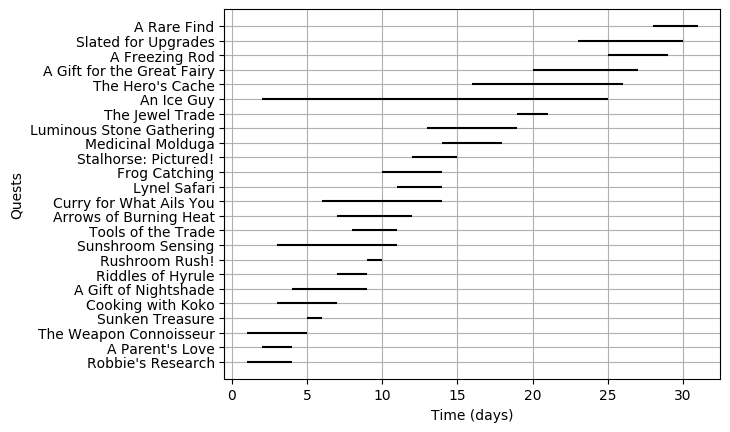

In [156]:
## plotting the quest activity vs time graph for a month
y=df['Quest'].to_list()

xmin = df['Start Date'].to_list()
xmax = df['End Date'].to_list()
rewards = df['Reward (in rupees)'].to_list()

#plt.plot(rewards)
plt.ylabel("Quests")
plt.xlabel("Time (days)")

plt.hlines(y, xmin, xmax)
plt.grid()
plt.show()

### Dynamic Programming approach

In [215]:
class Job: 
    def __init__(self, quest, start, finish, reward):
        self.quest =  quest
        self.start  = int(start) 
        self.finish = int(finish) 
        self.reward  = reward 
  
  
# Finding the next compatible quest for Link using Binary Search
def binarySearch(job, start_index): 
  
    # Initialize 'lo' and 'hi' for Binary Search 
    lo = 0
    hi = start_index - 1
  
    # Perform binary Search iteratively 
    while lo <= hi: 
        mid = (lo + hi) // 2
        if job[mid].finish <= job[start_index].start: 
            if job[mid + 1].finish <= job[start_index].start: 
                lo = mid + 1
            else: 
                return mid 
        else: 
            hi = mid - 1
    return -1
  
# Returns the maximum possible 
# rewards from given array of quests
def schedule(quest): 
  
    # Create an array to store solutions of all possible quests.  table[i] 
    # stores the rewards for quests till arr[i] (including arr[i]) 
    n = len(quest)  
    table = [0 for _ in range(n)] 
  
    table[0] = quest[0].reward; 
      
    parent = [0]
    
    for i in range(1, n):
        # Find reward including the current quest
        questRewards = quest[i].reward
        l = binarySearch(quest, i) 
        if (l != -1):
            questRewards += table[l]
        
        if questRewards > table[i - 1]:
            table[i] = questRewards
            parent.append(1)
        else:
            table[i] = table[i - 1]
            parent.append(0)
        
    seq = []
    temp = 0
    i = len(parent) - 1
    while i >= 0:
        if parent[i] == 1:
            seq.append(quest[i].quest)
            temp = binarySearch(quest, i)
            i = temp
        else:
            i -= 1
    seq = seq[::-1]
    return "Maximized Earnings  is " + str(
        table[-1])+" rupees." + " Link should pick the quests " + str(seq) + " in that order." 

In [216]:
quests=[]
for i, reward in enumerate(rewards):
    quests.append(Job(y[i], xmin[i],xmax[i],reward))

schedule(quests)

"Maximized Earnings  is 5970 rupees. Link should pick the quests ['The Weapon Connoisseur', 'Sunken Treasure', 'Riddles of Hyrule', 'Rushroom Rush!', 'Frog Catching', 'Medicinal Molduga', 'A Gift for the Great Fairy', 'A Rare Find'] in that order."

### The above solution works for any given quest board as it takes into account the maximum earnings for Link. 

#### Step 1. 
We first sort all our activites based on the their finish times and compare the quests one by one to find the next compatible quest because quests cannot overlap each other.

#### Step 2.
We use a binary search to find the most compatible quest. This takes us O(lg n) time.

#### Step 3.
We do this n times and while we do this we save the quest names to out put all the possible quests in the end.

#### Step 4. 
Keep adding the reqard of all the compatible, highest rewards and display the sum in the end. 